Step 1: Import Necessary Libraries

In [11]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.optimizers import SGD, Adam, RMSprop


Step 2: Load and Preprocess Dataset

In [12]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)


Step 3: Define the Neural Network Model

In [13]:
def build_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),  # Converts 28x28 images into a 1D vector
        Dense(512, activation='relu'),
        BatchNormalization(),  # Normalizes activations for stable training
        Dropout(0.3),  # Reduces overfitting by randomly turning off 30% of neurons
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')  # Output layer with 10 classes
    ])
    return model


Step 4: Define Optimizers

- SGD (Stochastic Gradient Descent): Uses momentum to update weights.
- Adam: Combines momentum and adaptive learning rate.
- RMSprop: Uses a moving average of squared gradients for stability.

In [14]:
optimizers = {
    "SGD": SGD(learning_rate=0.01),
    "Adam": Adam(learning_rate=0.001),
    "RMSprop": RMSprop(learning_rate=0.001)
}

Step 5: Train & Evaluate Models with Different Optimizers

In [15]:
history_dict = {}

for opt_name, opt in optimizers.items():
    print(f"Training with {opt_name} optimizer...")
    
    model = build_model()
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64, verbose=1)
    history_dict[opt_name] = history.history  # Store training history


Training with SGD optimizer...
Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7285 - loss: 0.8603 - val_accuracy: 0.9395 - val_loss: 0.1993
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9139 - loss: 0.2850 - val_accuracy: 0.9544 - val_loss: 0.1455
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9340 - loss: 0.2157 - val_accuracy: 0.9624 - val_loss: 0.1232
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9437 - loss: 0.1840 - val_accuracy: 0.9666 - val_loss: 0.1082
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9513 - loss: 0.1595 - val_accuracy: 0.9689 - val_loss: 0.0990
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9554 - loss: 0.1439 - val_accuracy: 0.9703 - val_loss: 0.0937
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9598 - loss: 0.1308 - val_accuracy: 0.9733 - val_loss: 0.0870
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9625 - 

Step 6: Compare Optimizer Performance

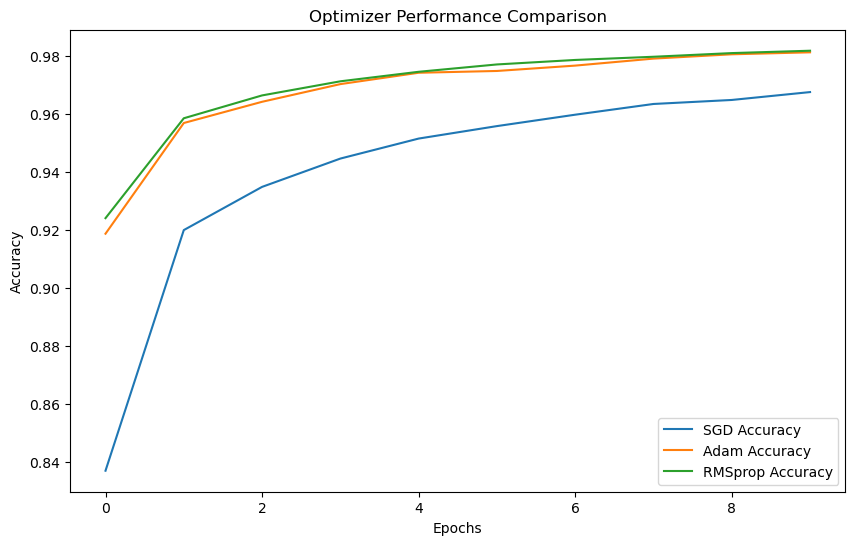

In [16]:
plt.figure(figsize=(10, 6))
for opt_name in optimizers.keys():
    plt.plot(history_dict[opt_name]['accuracy'], label=f"{opt_name} Accuracy")

plt.title('Optimizer Performance Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Step 7: Effect of Learning Rate on Performance

In [17]:
learning_rates = [0.0001, 0.001, 0.01]
lr_results = {}

for lr in learning_rates:
    print(f"\nTraining with Adam optimizer, Learning Rate={lr}...")
    model = build_model()
    model.compile(optimizer=Adam(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy'])
    
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64, verbose=1)
    lr_results[lr] = history.history['accuracy']


Training with Adam optimizer, Learning Rate=0.0001...
Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6479 - loss: 1.1590 - val_accuracy: 0.9401 - val_loss: 0.1964
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9242 - loss: 0.2522 - val_accuracy: 0.9567 - val_loss: 0.1342
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9450 - loss: 0.1804 - val_accuracy: 0.9665 - val_loss: 0.1064
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9549 - loss: 0.1453 - val_accuracy: 0.9710 - val_loss: 0.0896
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9635 - loss: 0.1204 - val_accuracy: 0.9734 - val_loss: 0.0824
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9683 - loss: 0.1001 - val_accuracy: 0.9759 - val_loss: 0.0766
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9727 - loss: 0.0864 - val_accuracy: 0.9765 - val_loss: 0.0701
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1

Step 8: Plot Learning Rate Effect

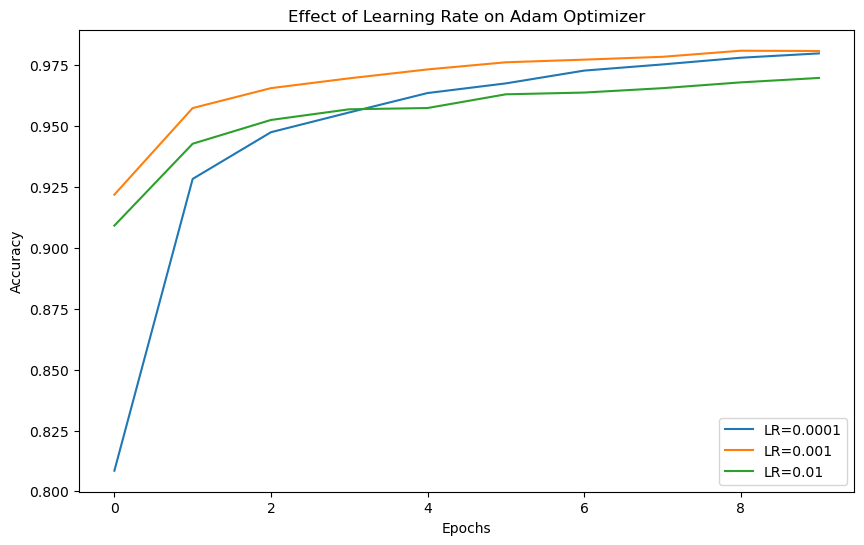

In [18]:
plt.figure(figsize=(10, 6))
for lr in learning_rates:
    plt.plot(lr_results[lr], label=f"LR={lr}")

plt.title('Effect of Learning Rate on Adam Optimizer')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Step 9: Effect of Batch Size

In [19]:
batch_sizes = [32, 128]
batch_results = {}

for batch in batch_sizes:
    print(f"\nTraining with Adam optimizer, Batch Size={batch}...")
    model = build_model()
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=batch, verbose=1)
    batch_results[batch] = history.history['accuracy']


Training with Adam optimizer, Batch Size=32...
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.8679 - loss: 0.4192 - val_accuracy: 0.9563 - val_loss: 0.1362
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9461 - loss: 0.1709 - val_accuracy: 0.9695 - val_loss: 0.0980
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9585 - loss: 0.1346 - val_accuracy: 0.9755 - val_loss: 0.0810
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9640 - loss: 0.1153 - val_accuracy: 0.9774 - val_loss: 0.0730
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9676 - loss: 0.1040 - val_accuracy: 0.9769 - val_loss: 0.0703
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9714 - loss: 0.0895 - val_accuracy: 0.9779 - val_loss: 0.0699
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9719 - loss: 0.0873 - val_accuracy: 0.9812 - val_loss: 0.0632
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━

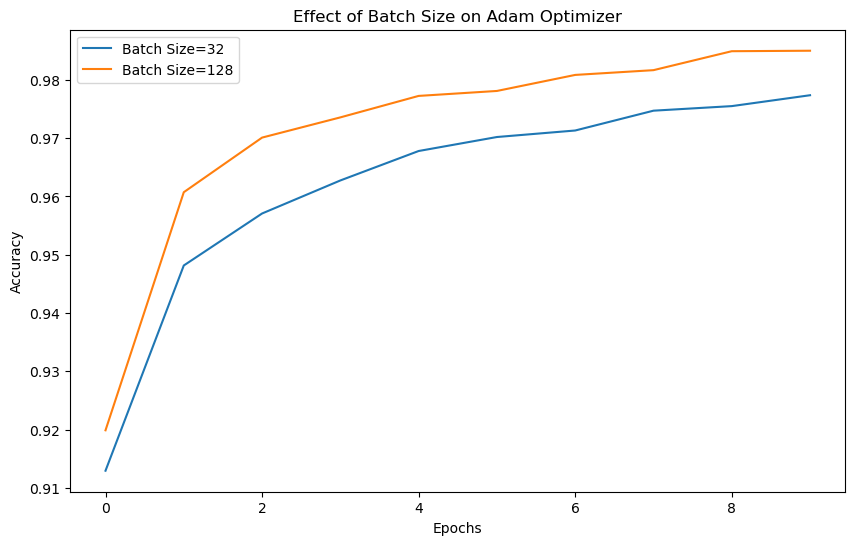

In [23]:
# Plot the results
plt.figure(figsize=(10, 6))
for batch in batch_sizes:
    plt.plot(batch_results[batch], label=f"Batch Size={batch}")

plt.title('Effect of Batch Size on Adam Optimizer')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Step 10: Effect of Dropout & Batch Normalization

In [20]:
model_without_dropout_bn = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model_without_dropout_bn.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history_no_dropout_bn = model_without_dropout_bn.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64, verbose=1)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8947 - loss: 0.3607 - val_accuracy: 0.9693 - val_loss: 0.1019
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9739 - loss: 0.0838 - val_accuracy: 0.9728 - val_loss: 0.0877
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9836 - loss: 0.0527 - val_accuracy: 0.9716 - val_loss: 0.0943
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9876 - loss: 0.0388 - val_accuracy: 0.9767 - val_loss: 0.0840
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9896 - loss: 0.0313 - val_accuracy: 0.9759 - val_loss: 0.0868
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9914 - loss: 0.0280 - val_accuracy: 0.9785 - val_loss: 0.0831
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9922 - loss: 0.0247 - val_accuracy: 0.9796 - val_loss: 0.0794
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9944 - loss: 0.0171 - val

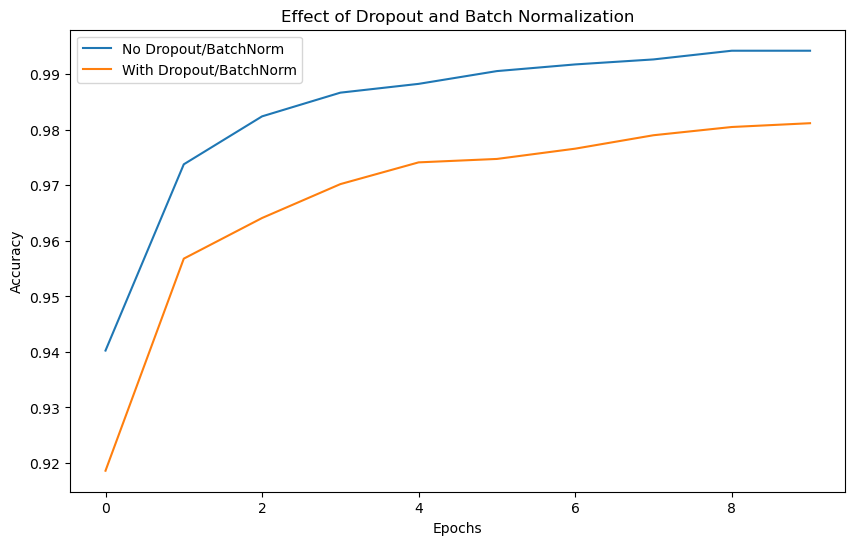

In [22]:
# Plot results
plt.figure(figsize=(10, 6))
plt.plot(history_no_dropout_bn.history['accuracy'], label="No Dropout/BatchNorm")
plt.plot(history_dict['Adam']['accuracy'], label="With Dropout/BatchNorm")
plt.title('Effect of Dropout and Batch Normalization')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
